
# APRIORI


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the uploaded CSV into a DataFrame
df = pd.read_csv('popo.csv')
df.head()


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.fillna(0,inplace=True)
df.head()


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
# Data Pre-processing step

# for using aprori , need to convert data in list format..
# transaction = [['apple','almonds'],['apple'],['banana','apple']]....

transactions = []

for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])



In [ ]:
transactions

[['burgers', 'meatballs', 'eggs', '0.0'],
 ['chutney', '0.0'],
 ['turkey', 'avocado', '0.0'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  '0.0'],
 ['low fat yogurt', '0.0'],
 ['whole wheat pasta', 'french fries', '0.0'],
 ['soup', 'light cream', 'shallot', '0.0'],
 ['frozen vegetables', 'spaghetti', 'green tea', '0.0'],
 ['french fries', '0.0'],
 ['eggs', 'pet food', '0.0'],
 ['cookies', '0.0'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil', '0.0'],
 ['spaghetti', 'champagne', 'cookies', '0.0'],
 ['mineral water', 'salmon', '0.0'],
 ['mineral water', '0.0'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt',
  '0.0'],
 ['turkey', 'eggs', '0.0'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate',
  '0.0'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar', '0.0'],
 ['red wine

# Implement the Apriori algorithm from scratch using Python.

In [ ]:

min_support = 0.5

# Función de Apriori
def apriori_scratch(min_support):
    dataset = transactions  # Aquí usas el dataset en formato de lista
    C1 = set()

    # Crear el conjunto de 1-itemsets
    for transaction in dataset:
        for item in transaction:
            C1.add(frozenset([item]))

    L1 = set()

    # Filtrar itemsets según el soporte mínimo
    for itemset in C1:
        if support(itemset, dataset) >= min_support:
            L1.add(itemset)

    k = 2
    while L1:
        Ck = set()

        # Generar combinaciones de itemsets de tamaño k
        for itemset1 in L1:
            for itemset2 in L1:
                if len(itemset1.union(itemset2)) == k:
                    Ck.add(itemset1.union(itemset2))

        Lk = set()

        # Filtrar itemsets según el soporte mínimo
        for itemset in Ck:
            if support(itemset, dataset) >= min_support:
                Lk.add(itemset)

        if not Lk:
            break

        k += 1
        L1 = Lk

    return L1

# Función de soporte
def support(itemset, dataset):
    count = 0
    for transaction in dataset:
        if itemset.issubset(transaction):
            count += 1
    return count / len(dataset)

# Ejecutar Apriori
frequent_itemsets = apriori_scratch(min_support)
print("Frequent Itemsets:", frequent_itemsets)

Frequent Itemsets: {frozenset({'0.0'})}


# experiment with different support thresholds.

In [ ]:
import pandas as pd
import time
import sys


# Define los mínimos soportes
min_support1 = 0.02
min_support2 = 0.03
min_support3 = 0.04

# Medir tiempo y uso de memoria para min_support1
start_time = time.time()
frequent_itemsets1 = apriori_scratch(min_support1)
end_time = time.time()

runtime1 = end_time - start_time
memory_usage1 = sys.getsizeof(frequent_itemsets1)

# Medir tiempo y uso de memoria para min_support2
start_time = time.time()
frequent_itemsets2 = apriori_scratch(min_support2)
end_time = time.time()

runtime2 = end_time - start_time
memory_usage2 = sys.getsizeof(frequent_itemsets2)

# Medir tiempo y uso de memoria para min_support3
start_time = time.time()
frequent_itemsets3 = apriori_scratch(min_support3)
end_time = time.time()

runtime3 = end_time - start_time
memory_usage3 = sys.getsizeof(frequent_itemsets3)

# Imprimir los resultados
print(f'Frequent Itemsets for min_support {min_support1}: {frequent_itemsets1}, Runtime: {runtime1:.4f}s, Memory Usage: {memory_usage1} bytes')
print(f'Frequent Itemsets for min_support {min_support2}: {frequent_itemsets2}, Runtime: {runtime2:.4f}s, Memory Usage: {memory_usage2} bytes')
print(f'Frequent Itemsets for min_support {min_support3}: {frequent_itemsets3}, Runtime: {runtime3:.4f}s, Memory Usage: {memory_usage3} bytes')


Frequent Itemsets for min_support 0.02: {frozenset({'0.0', 'french fries', 'milk'}), frozenset({'0.0', 'chocolate', 'spaghetti'}), frozenset({'0.0', 'spaghetti', 'frozen vegetables'}), frozenset({'soup', '0.0', 'mineral water'}), frozenset({'0.0', 'eggs', 'green tea'}), frozenset({'olive oil', '0.0', 'mineral water'}), frozenset({'0.0', 'green tea', 'mineral water'}), frozenset({'0.0', 'eggs', 'frozen vegetables'}), frozenset({'burgers', '0.0', 'eggs'}), frozenset({'0.0', 'french fries', 'spaghetti'}), frozenset({'eggs', '0.0', 'pancakes'}), frozenset({'0.0', 'mineral water', 'chicken'}), frozenset({'0.0', 'chocolate', 'milk'}), frozenset({'0.0', 'frozen vegetables', 'mineral water'}), frozenset({'0.0', 'eggs', 'ground beef'}), frozenset({'0.0', 'shrimp', 'mineral water'}), frozenset({'0.0', 'cooking oil', 'mineral water'}), frozenset({'0.0', 'chocolate', 'eggs'}), frozenset({'0.0', 'whole wheat rice', 'mineral water'}), frozenset({'0.0', 'pancakes', 'mineral water'}), frozenset({'0.0'

# Analyze the performance of the algorithm in terms of running time and memory usage.

In [ ]:

# Crear la cadena de resultados para cada soporte mínimo
results_apriori1 = f"Apriori Runtime (min_support={min_support1}): {runtime1:.6f} seconds\nApriori Memory Usage: {memory_usage1} bytes"
results_apriori2 = f"Apriori Runtime (min_support={min_support2}): {runtime2:.6f} seconds\nApriori Memory Usage: {memory_usage2} bytes"
results_apriori3 = f"Apriori Runtime (min_support={min_support3}): {runtime3:.6f} seconds\nApriori Memory Usage: {memory_usage3} bytes"

# Imprimir los resultados
print(results_apriori1)
print(results_apriori2)
print(results_apriori3)



Apriori Runtime (min_support=0.02): 11.710747 seconds
Apriori Memory Usage: 2264 bytes
Apriori Runtime (min_support=0.03): 5.721834 seconds
Apriori Memory Usage: 728 bytes
Apriori Runtime (min_support=0.04): 3.079719 seconds
Apriori Memory Usage: 728 bytes


# **Frequent Path growth algorithm**

In [ ]:
# Primero, asegúrate de que las bibliotecas necesarias están instaladas.
!pip install mlxtend

import pandas as pd
import time
import sys
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

# Define el soporte mínimo
min_support1 = 0.02

# Función para FP-Growth
def fp_growth(min_support, dataset):
    te = TransactionEncoder()
    te_data = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_data, columns=te.columns_)
    frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
    return frequent_itemsets

# Medir tiempo y uso de memoria para FP-Growth
start_time = time.time()
output_fpg = fp_growth(min_support1, transactions)
end_time = time.time()

runtime = end_time - start_time
memory_usage = sys.getsizeof(output_fpg)

# Crear la cadena de resultados para FP-Growth
results_fpg = f"\n{'*'*10}\nFP_growth Runtime: {runtime:.6f} seconds\nFP_growth Memory Usage: {memory_usage} bytes"

# Imprimir los resultados
print(results_fpg)

# Mostrar el output de FP-Growth
print(output_fpg)



**********
FP_growth Runtime: 0.136249 seconds
FP_growth Memory Usage: 48632 bytes
      support               itemsets
0    1.000000                  (0.0)
1    0.179733                 (eggs)
2    0.087200              (burgers)
3    0.020933            (meatballs)
4    0.062533               (turkey)
..        ...                    ...
204  0.030133          (0.0, butter)
205  0.022533     (french wine, 0.0)
206  0.020267         (0.0, almonds)
207  0.030267    (0.0, tomato juice)
208  0.025600  (0.0, vegetables mix)

[209 rows x 2 columns]


# Compare its performance with the Apriori algorithm on the same dataset.

In [ ]:
print(results_fpg)
print(results_apriori1)



**********
FP_growth Runtime: 0.136249 seconds
FP_growth Memory Usage: 48632 bytes
Apriori Runtime (min_support=0.02): 11.710747 seconds
Apriori Memory Usage: 2264 bytes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Analyze the factors that contribute to the efficiency of FP-growth.


Each algorithm serves different use cases effectively:

- **Apriori Algorithm**: Best for small to moderate-sized datasets. It generates candidate itemsets and counts their support through multiple passes, making it less efficient for large datasets due to high computational costs and memory usage.

- **FP-Growth Algorithm**: Ideal for very large datasets. It uses a compact data structure (FP-tree) to minimize memory usage and employs a divide-and-conquer strategy, allowing for faster mining of frequent itemsets without generating candidates. This makes it suitable for applications like market basket analysis and recommendation systems, where quick processing is essential.

In summary, use Apriori for simplicity with small datasets and FP-Growth for efficiency with large datasets.



# **Explore different support and confidence thresholds**

In [ ]:
# Install the required libraries for Apriori and FP-Growth algorithms
!pip install mlxtend

from itertools import combinations
from collections import defaultdict
from mlxtend.frequent_patterns import apriori, association_rules



# Function to calculate support
def calculate_support(itemset, transactions):
    return sum(1 for transaction in transactions if itemset.issubset(set(transaction))) / len(transactions)

# Apriori Algorithm
def apriori_algorithm(transactions, min_support):
    item_count = defaultdict(int)

    # Count occurrences of individual items
    for transaction in transactions:
        for item in transaction[:-1]:  # Exclude the last element (price)
            item_count[item] += 1

    # Create a list of frequent itemsets
    frequent_itemsets = {frozenset([item]): count / len(transactions) for item, count in item_count.items() if count / len(transactions) >= min_support}

    # Generate larger itemsets
    k = 2
    while True:
        candidates = set()
        for itemset1 in frequent_itemsets:
            for itemset2 in frequent_itemsets:
                candidate = itemset1.union(itemset2)
                if len(candidate) == k:
                    candidates.add(candidate)

        new_frequent_itemsets = {}
        for candidate in candidates:
            support = calculate_support(candidate, transactions)
            if support >= min_support:
                new_frequent_itemsets[candidate] = support

        if not new_frequent_itemsets:
            break

        frequent_itemsets.update(new_frequent_itemsets)
        k += 1

    return frequent_itemsets

# Function to generate rules
def generate_rules(frequent_itemsets, min_confidence):
    rules = []
    for itemset in frequent_itemsets:
        subsets = [frozenset([item]) for item in itemset]
        for antecedent in subsets:
            consequent = itemset.difference(antecedent)
            if len(consequent) > 0:  # Ensure consequent is not empty
                support_antecedent = calculate_support(antecedent, transactions)
                support_consequent = calculate_support(itemset, transactions)
                confidence = support_consequent / support_antecedent if support_antecedent > 0 else 0
                if confidence >= min_confidence:
                    rules.append((antecedent, consequent, confidence))
    return rules

# FP-Growth Algorithm (simple version)
def fp_growth(transactions, min_support):
    item_count = defaultdict(int)

    # Count occurrences of individual items
    for transaction in transactions:
        for item in transaction[:-1]:  # Exclude the last element (price)
            item_count[item] += 1

    # Filter items by support
    frequent_items = {item for item, count in item_count.items() if count / len(transactions) >= min_support}

    # Create the FP tree
    class TreeNode:
        def __init__(self, name, count, parent=None):
            self.name = name
            self.count = count
            self.parent = parent
            self.children = {}

        def add_child(self, child_name, count):
            if child_name not in self.children:
                self.children[child_name] = TreeNode(child_name, count, self)
            else:
                self.children[child_name].count += count

    def create_fp_tree(transactions, min_support):
        root = TreeNode("root", 1)
        for transaction in transactions:
            # Filter and sort items in the transaction
            filtered_items = [item for item in transaction[:-1] if item in frequent_items]
            filtered_items.sort(key=lambda x: item_count[x], reverse=True)

            if filtered_items:
                current_node = root
                for item in filtered_items:
                    current_node.add_child(item, 1)
                    current_node = current_node.children[item]

        return root

    # Build the FP tree
    fp_tree = create_fp_tree(transactions, min_support)
    return frequent_items  # You can expand this to return itemsets based on the tree structure

# Experimenting with different thresholds
support_thresholds = [0.01, 0.03, 0.05, 0.07]
confidence_thresholds = [0.5, 0.6, 0.7, 0.8]

results = []

for min_support in support_thresholds:
    for min_confidence in confidence_thresholds:
        # Apply Apriori
        frequent_itemsets = apriori_algorithm(transactions, min_support)
        rules_apriori = generate_rules(frequent_itemsets, min_confidence)

        # Apply FP-Growth
        frequent_itemsets_fp = fp_growth(transactions, min_support)
        # You can implement a rules generation function for FP-Growth similar to the Apriori function

        # Store results
        results.append({
            'min_support': min_support,
            'min_confidence': min_confidence,
            'apriori_rules_count': len(rules_apriori),
            # Add rules count for FP-Growth once implemented
        })

# Display results
print("Results of Support and Confidence Thresholds Experiment:")
for result in results:
    print(result)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Results of Support and Confidence Thresholds Experiment:
{'min_support': 0.01, 'min_confidence': 0.5, 'apriori_rules_count': 0}
{'min_support': 0.01, 'min_confidence': 0.6, 'apriori_rules_count': 0}
{'min_support': 0.01, 'min_confidence': 0.7, 'apriori_rules_count': 0}
{'min_support': 0.01, 'min_confidence': 0.8, 'apriori_rules_count': 0}
{'min_support': 0.03, 'min_confidence': 0.5, 'apriori_rules_count': 0}
{'min_support': 0.03, 'min_confidence': 0.6, 'apriori_rules_count': 0}
{'min_support': 0.03, 'min_confidence': 0.7, 'apriori_rules_count': 0}
{'min_support': 0.03, 'min_confidence': 0.8, 'apriori_rules_count': 0}
{'min_support': 0.05, 'min_confidence': 0.5, 'apriori_rules_count': 0}
{'min_support': 0.05, 'min_confidence': 0.6, 'apriori_rules_count': 0}
{'min_support': 0.05, 'min_confidence': 0.7, 'apriori_rules_count': 0}
{'min_support': 0.05, 'min_confidence': 0.8, 'apriori_rules_count': 0}
{'min_support': 0.07, 'min_confidence': 0.5, 'apriori_rules_count': 0}
{'min_support': 0.07

# Experiment with different support and confidence thresholds in both Apriori and FP-growth algorithms.

In [ ]:
# Convert transactions to one-hot encoded format for mlxtend
from mlxtend.preprocessing import TransactionEncoder

# One-hot encoding
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Experimenting with different thresholds
support_thresholds = [0.01, 0.03, 0.05, 0.07]
confidence_thresholds = [0.5, 0.6, 0.7, 0.8]

results = []

for min_support in support_thresholds:
    # Apply Apriori
    frequent_itemsets = apriori(onehot_df, min_support=min_support, use_colnames=True)

    for min_confidence in confidence_thresholds:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

        # Store results
        for _, row in rules.iterrows():
            results.append({
                'antecedents': row['antecedents'],
                'consequents': row['consequents'],
                'confidence': row['confidence'],
                'support': row['support']
            })

# Display results
import pandas as pd

results_df = pd.DataFrame(results)
print("Results of Support and Confidence Thresholds Experiment:")
print(results_df[['antecedents', 'consequents', 'confidence']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Results of Support and Confidence Thresholds Experiment:
           antecedents consequents  confidence
0            (almonds)       (0.0)         1.0
1            (avocado)       (0.0)         1.0
2     (barbecue sauce)       (0.0)         1.0
3          (black tea)       (0.0)         1.0
4         (body spray)       (0.0)         1.0
...                ...         ...         ...
1429            (milk)       (0.0)         1.0
1430   (mineral water)       (0.0)         1.0
1431        (pancakes)       (0.0)         1.0
1432          (shrimp)       (0.0)         1.0
1433       (spaghetti)       (0.0)         1.0

[1434 rows x 3 columns]


# Analyze how changes in these thresholds affect the number and types of frequent itemsets discovered.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


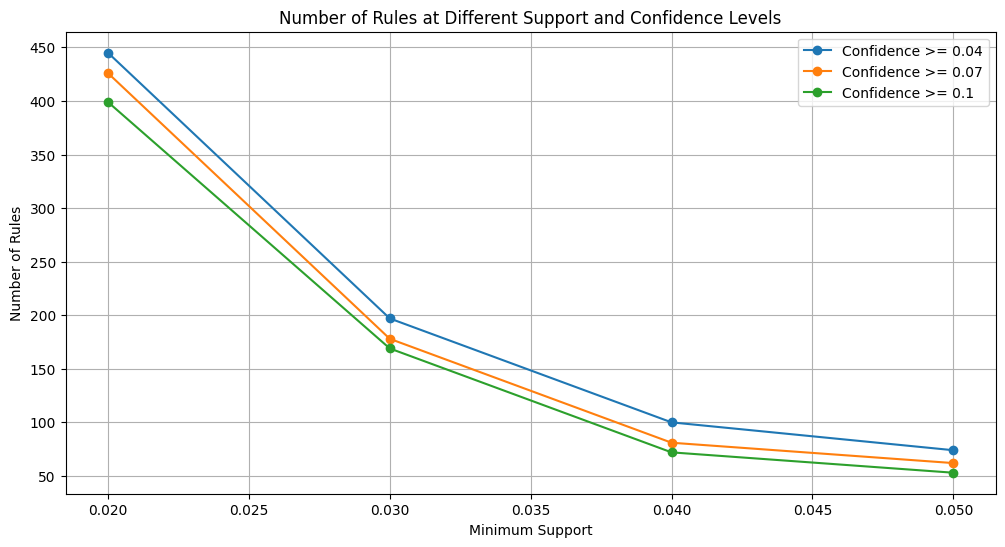

In [ ]:
import matplotlib.pyplot as plt

# Define thresholds for testing
support_values = [0.02, 0.03, 0.04, 0.05]
confidence_values = [0.04, 0.07, 0.1]

# Almacenar resultados
results = []

def apriori_analysis(dataset, min_support, min_confidence):
    # Transformar el dataset usando TransactionEncoder
    te = TransactionEncoder()
    te_data = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_data, columns=te.columns_)

    # Aplicar el algoritmo apriori
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

    # Generar reglas con el umbral de confianza especificado
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    return rules

# Iterar a través de cada combinación de umbrales
for min_support in support_values:
    for min_confidence in confidence_values:
        rules = apriori_analysis(transactions, min_support, min_confidence)
        results.append({
            'min_support': min_support,
            'min_confidence': min_confidence,
            'num_rules': len(rules),
            'avg_confidence': rules['confidence'].mean() if not rules.empty else 0
        })

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results)

# Graficar el número de reglas para cada umbral
plt.figure(figsize=(12, 6))
for conf in confidence_values:
    subset = df_results[df_results['min_confidence'] == conf]
    plt.plot(subset['min_support'], subset['num_rules'], marker='o', label=f'Confidence >= {conf}')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Rules')
plt.title('Number of Rules at Different Support and Confidence Levels')
plt.legend()
plt.grid()
plt.show()